In [12]:
# 1.1 Introduction

import pandas as pd
abalone = pd.read_csv('abalone.data', header=None)

# read data from the internet
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/' 
dataname  = 'datasets/iris.csv' 
iris = pd.read_csv(urlprefix + dataname)

# drop the Unnamed column and display 3 rows with features
# iris.drop('Unnamed: 0',1).head(20)

# access the row
iris['Sepal.Length']

# assign column names
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'] 
abalone.head(3)

,Sex,Length,Diameter,Height,...,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,...,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,...,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,...,0.2565,0.1415,0.21,9


In [13]:
# 1.2 Structuring features

nutri = pd.read_excel('nutrition_elderly.xls')
pd.set_option('display.max_columns', 8) #to fit display
# nutri.info() #check type(structure) of the variables

# 1 - Male
# 2 - Female 
gender_dct = {1:'Male', 2:'Female'}
nutri['gender'] = nutri['gender'].replace(gender_dct).astype('category')

fat_dct  = {1:'Butter', 2:'Margarine', 3:'Peanut oil',
            4:'Sunflower oil', 5:'Olive oil', 6:'Mix of vegetable oils',
            7:'Colza oil', 8:'Duck or goose fat'}

meat_dct = {0:'Never', 1:'Less than once a week', 2:'Once a week', 3:'2-3 times a week',
            4:'4-6 times as week', 5:'Every day'}

nutri['fat'] = nutri['fat'].replace(fat_dct).astype('category')

# meat is the same for all other qualitive descriptions ['fish', 'raw_fruit', 'cooked_fruit_veg', 'chocol' ]
nutri['meat'] = nutri['meat'].replace(meat_dct).astype('category')
nutri['fish'] = nutri['fish'].replace(meat_dct).astype('category')
nutri['raw_fruit'] = nutri['raw_fruit'].replace(meat_dct).astype('category')
nutri['cooked_fruit_veg'] = nutri['cooked_fruit_veg'].replace(meat_dct).astype('category')
nutri['chocol'] = nutri['chocol'].replace(meat_dct).astype('category')


family_dct = {1:'Single', 2:'Living with a spouse', 3:'Living with a family',
            4:'Living with someone else'}
nutri['situation'] = nutri['situation'].replace(family_dct).astype('category')
nutri['height'] = nutri['height'].astype(float)
nutri['weight'] = nutri['weight'].astype(float)
nutri.to_csv('nutri.csv', index=False)
nutri.head()

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,Female,Single,0,0,...,Less than once a week,4-6 times as week,Every day,Mix of vegetable oils
1,Female,Single,1,1,...,Every day,Every day,Less than once a week,Sunflower oil
2,Female,Single,0,4,...,Every day,Once a week,Every day,Sunflower oil
3,Female,Single,0,0,...,4-6 times as week,Never,2-3 times a week,Margarine
4,Female,Single,2,1,...,Every day,Every day,2-3 times a week,Margarine


In [14]:
# 1.3 Summary tables

nutri = pd.read_csv('nutri.csv')
# nutri['fat'].describe() # We see that there are 8 difefrent types of fat used and that sunflower has the highest count, with 68 out of 226 individuals using this type of cooking fat\
d = dict(nutri['fat'].value_counts()) #frequency table
d
# we can access column labels as attributes
# nutri.fat.value_counts()

# cross tabulate
#pd.crosstab(nutri.gender, nutri.situation, margins=True) #add totals with margin=True

{'Sunflower oil': 68,
 'Peanut oil': 48,
 'Olive oil': 40,
 'Margarine': 27,
 'Mix of vegetable oils': 23,
 'Butter': 15,
 'Duck or goose fat': 4,
 'Colza oil': 1}

In [15]:
# 1.4 Summary statistics

nutri.height.mean()
nutri.height.quantile(q=[0.25, 0.50, 0.75])
nutri.height.max() -  nutri.height.min() #range
round(nutri.height.var(), 2) #variance how far each number in the set is from the mean (average), and thus from every other number in the set.
round(nutri.height.std(), 2) #standard deviation determining each data point's deviation relative to the mean.

# when applying decribe() to the quantitive feature, the return is the the following:
nutri.height.describe()

count    226.000000
mean     163.960177
std        9.003368
min      140.000000
25%      157.000000
50%      163.000000
75%      170.000000
max      188.000000
Name: height, dtype: float64

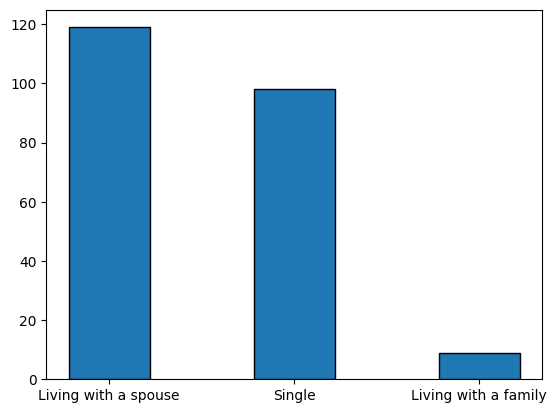

In [16]:
# 1.5 Visualizing Data

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

x = [0, 0.8, 1.6]
situations_counts = nutri['situation'].value_counts()
plt.bar(x, situations_counts, width=0.35, edgecolor='black')
plt.xticks(x, situations_counts.index)
plt.show()

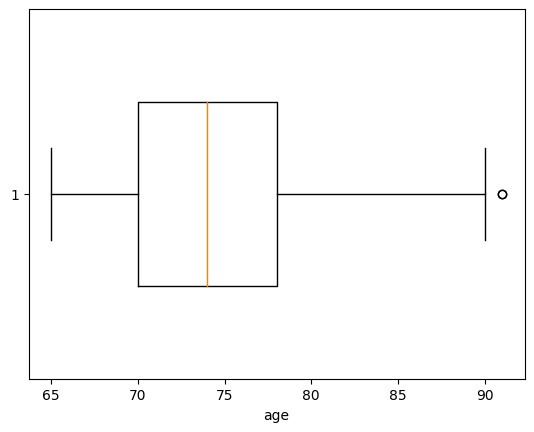

count    226.000000
mean      74.477876
std        6.005327
min       65.000000
25%       70.000000
50%       74.000000
75%       78.000000
max       91.000000
Name: age, dtype: float64

In [17]:
width = 0.5
plt.boxplot(nutri.age, widths=width, vert=False)
plt.xlabel('age')
plt.show()
nutri.age.describe() #the box is drawn from the first quartile Q1 to the third quartile Q3 
# the dot indicates that the data has an outlier

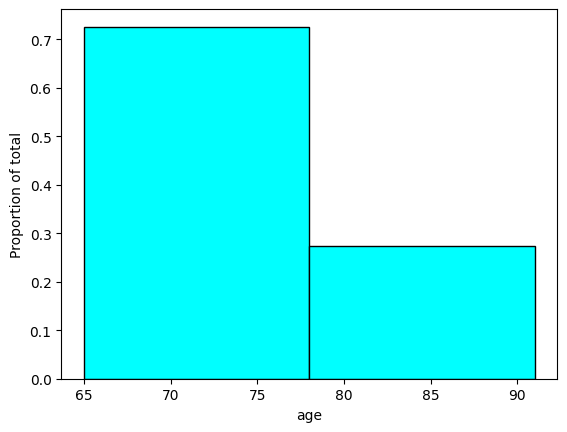

In [18]:
import numpy as np
# 1.5.2 Historgram
weights = np.ones_like(nutri.age)/nutri.age.count()
plt.hist(nutri.age, bins=2, weights=weights, facecolor='cyan', 
        edgecolor='black', linewidth=1)
plt.xlabel('age')
plt.ylabel('Proportion of total')
plt.show()


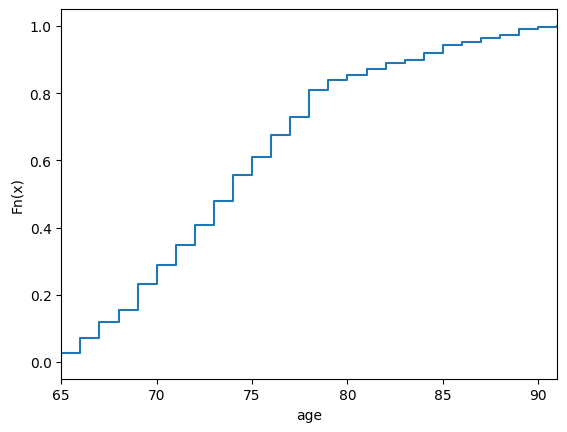

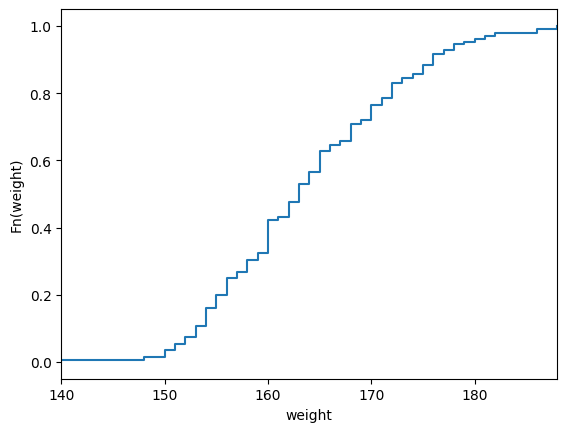

In [19]:
#1.5.2.3 Emeprical distribution function
import numpy as np
x = np.sort(nutri.age)
y = np.linspace(0, 1, len(nutri.age))
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x,y)
plt.xlim(x.min(), x.max())
plt.show()


x = np.sort(nutri.height)
y = np.linspace(0, 1, len(nutri.height))
plt.xlabel('weight')
plt.ylabel('Fn(weight)')
plt.step(x,y)
plt.xlim(x.min(), x.max())
plt.show()

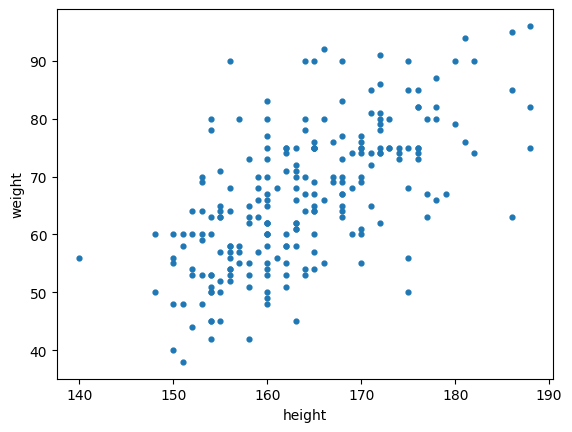

In [20]:
# 1.5.3.2
plt.scatter(nutri.height, nutri.weight, s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [21]:
import pandas as pd
# Excercises
mushroom = pd.read_csv("agaricus-lepiota.data")

# 1 Number of features(columns)
# len(mushroom.columns) 
# mushroom.info()

# 2 initial names and types of the features
#mushroom.columns

# 3 rename the first feature to the 'edibility' and the sixth feature to 'odor'
newcols = mushroom.columns.to_list() # cast series object to the list and the assign
newcols[0] = 'edibility'
newcols[5] = 'odor'
mushroom.columns = newcols

# 4 renaming
DICT = {'a': "almond", 'c': "creosote", 'f': "foul", 'l':"anise",'m': "musty",'n':"none", 'p': "pungent", 's':"spicy", 'y':"fishy"} 
mushroom.odor = mushroom.odor.replace(DICT)

edibility_dict = {'e': 'edible', 'p': 'poisonous'}
mushroom.edibility = mushroom.edibility.replace(edibility_dict)

# 5 cross table
pd.crosstab(mushroom.odor, mushroom.edibility)

# 6 Reformat the table
values = [[1,75,85],[2,30,50],[3,100,100],[4,50,52],[5,60,65]] 
df = pd.DataFrame(values, columns=['student', 'before', 'after'])
df = pd.melt(df, id_vars='student', var_name='Time', value_name='Value', value_vars=['before', 'after']) #math the regex, or you will get key error
df

# 7 Two bar plots
# import seaborn as sns
# sns.countplot(x='situation', hue='gender', data=nutri, hue_order=['Male', 'Female'], palette=['SkyBlue', 'Pink'],
#               saturation=1, edgecolor='black')
# plt.legend(loc='upper center')
# plt.xlabel('')
# plt.ylabel('counts')

TypeError: Index does not support mutable operations

In [ ]:
# -> 2
# 5 
